In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Data

We will get data using pandas datareader. Obtaining the stock information from the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

Created a list of the ticker symbols (as strings) in alphabetical order.

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Used pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. 
Set the keys argument equal to the tickers list.

In [5]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.584068  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.227402  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.270191  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.220268  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.241665  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.558952  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.583355  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.680946  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.717506  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.095600  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.242821  
2006-01-04   31.799999  31.530001  10870000.0  20.008041  
2006-01-05   31.500000  31.495001  10158000.0  19.985819  
2006-01-06   31.580000  31.680000   8403800.0  20.103214  
2006-01-09   31.674999  31.674999   5619600.0  20.100037  

[5 rows x 36 columns]

** What is the max Close price for each bank's stock throughout the time period?**

In [8]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

We used pandas pct_change() method on the Close column to create a column that represents this return value. Then created a for loop that goes through each stock and creates these returns. 

In [10]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Created a pairplot using seaborn of the returns dataframe.

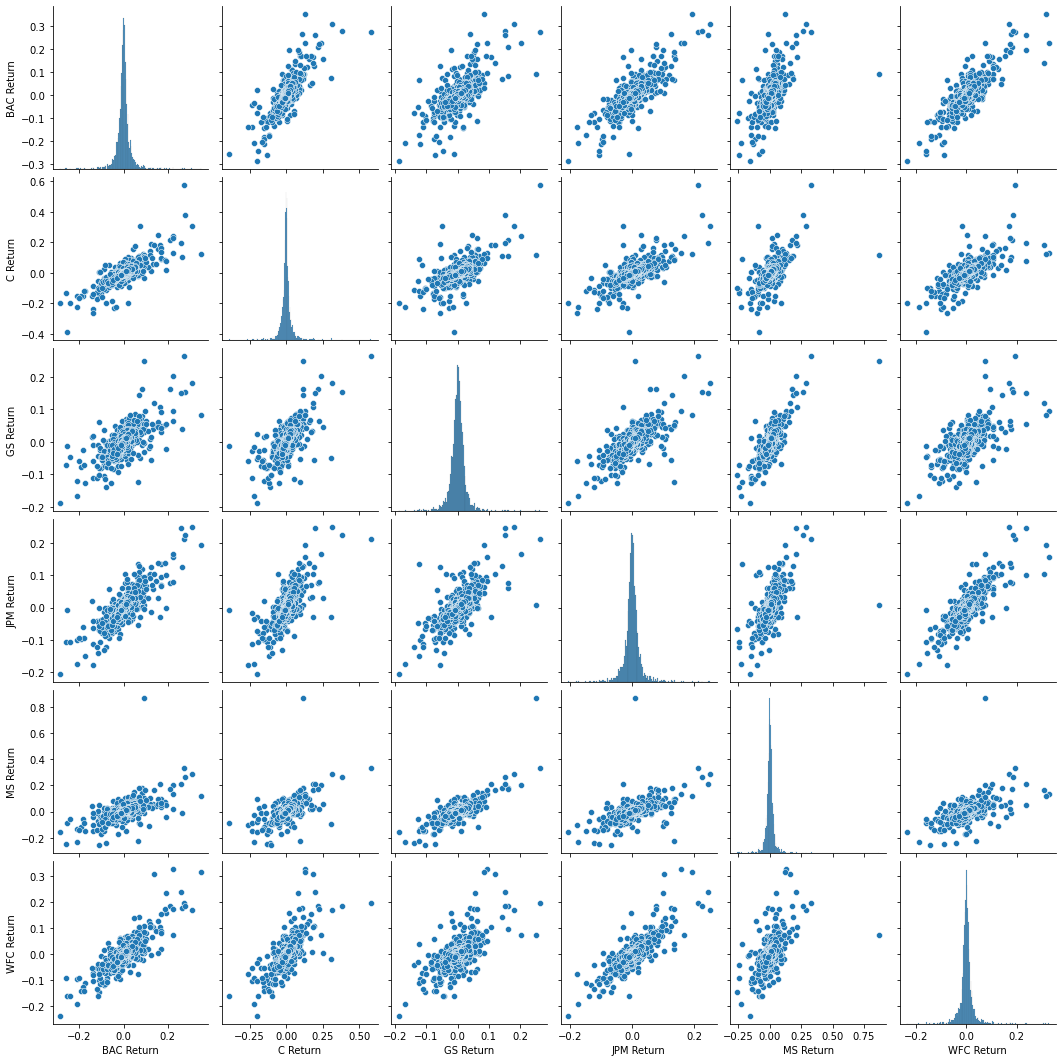

In [11]:
sns.pairplot(returns[1:])

Used this DataFrame to figure out what date each bank stock had the best and worst single day returns.

In [12]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [13]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [14]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [15]:
returns.loc['01-01-2015' : '12-31-2015'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Created a distplot using seaborn of the 2015 returns for Morgan Stanley

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

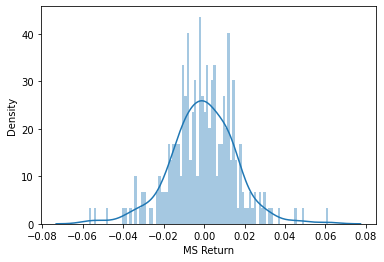

In [16]:
sns.distplot(returns.loc['01-01-2015' : '12-31-2015']['MS Return'],bins=100)

Created a distplot using seaborn of the 2008 returns for CitiGroup

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

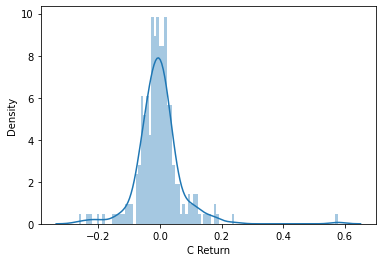

In [17]:
sns.distplot(returns.loc['01-01-2008' : '12-31-2008']['C Return'],bins=100)

# More Visualization
### Imports

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

Created a line plot showing the Close price for each bank for the entire index of time.

In [19]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.584068  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.227402  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.270191  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.220268  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.241665  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.558952  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.583355  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.680946  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.717506  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.095600  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.242821  
2006-01-04   31.799999  31.530001  10870000.0  20.008041  
2006-01-05   31.500000  31.495001  10158000.0  19.985819  
2006-01-06   31.580000  31.680000   8403800.0  20.103214  
2006-01-09   31.674999  31.674999   5619600.0  20.100037  

[5 rows x 36 columns]

<AxesSubplot:xlabel='Date'>

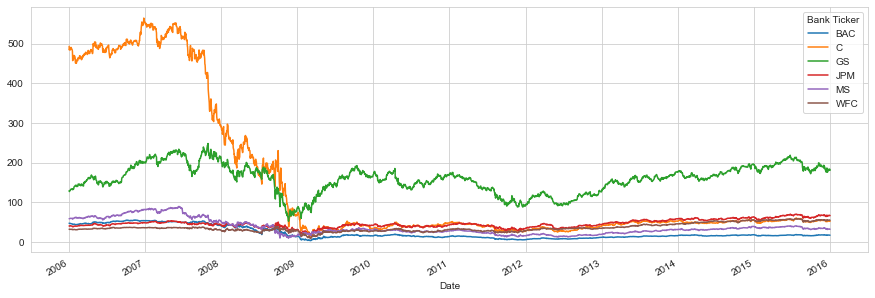

In [20]:
bank_stocks.xs(key= 'Close',level = 'Stock Info', axis=1).plot(figsize=(15,5))

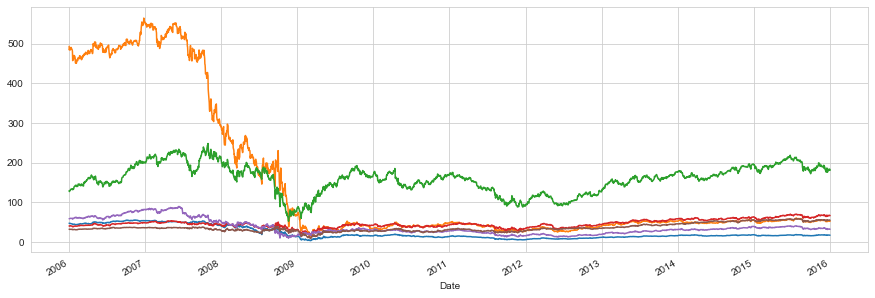

In [21]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(15,5), label = tick)

## Moving Averages

Plotted the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008.

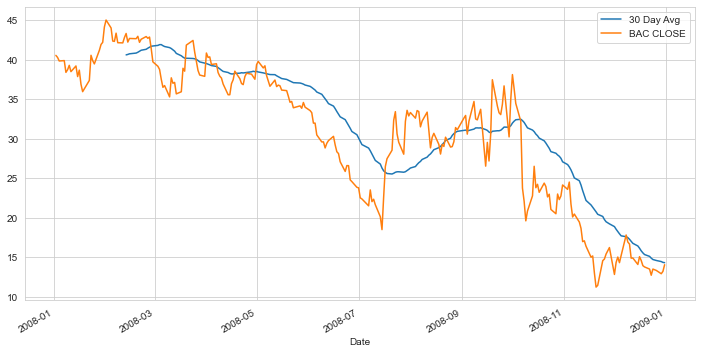

In [22]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

Created a heatmap of the correlation between the stocks Close Price

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

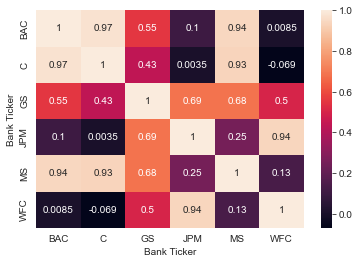

In [23]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Used seaborn's clustermap to cluster the correlations together

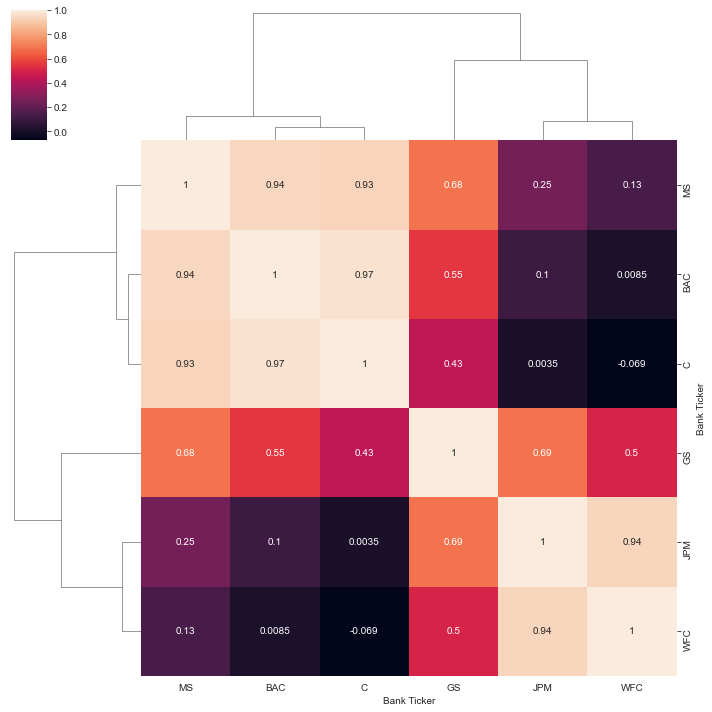

In [24]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Used .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.

In [25]:
bank_stocks.loc['01-01-2015':'01-01-2016']['BAC'].iplot(kind='candle')

Used .ta_plot to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

In [26]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

Used .ta_plot to create a Bollinger Band Plot for Bank of America for the year 2015.

In [27]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')